# Supervised Learning - Classification

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:32<00:00, 807kB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 1.20MB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:06<00:00, 730kB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 22.7MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [3]:
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = FashionMNISTModel()

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters())

In [5]:
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")


train(model, train_loader, criterion, optimizer, epochs=30)

Epoch [1/30], Loss: 1.4322
Epoch [2/30], Loss: 0.5355
Epoch [3/30], Loss: 0.4804
Epoch [4/30], Loss: 0.4599
Epoch [5/30], Loss: 0.4476
Epoch [6/30], Loss: 0.4433
Epoch [7/30], Loss: 0.4324
Epoch [8/30], Loss: 0.4303
Epoch [9/30], Loss: 0.4504
Epoch [10/30], Loss: 0.4246
Epoch [11/30], Loss: 0.4242
Epoch [12/30], Loss: 0.4496
Epoch [13/30], Loss: 0.4194
Epoch [14/30], Loss: 0.4142
Epoch [15/30], Loss: 0.4244
Epoch [16/30], Loss: 0.4151
Epoch [17/30], Loss: 0.4218
Epoch [18/30], Loss: 0.4208
Epoch [19/30], Loss: 0.4264
Epoch [20/30], Loss: 0.4161
Epoch [21/30], Loss: 0.4129
Epoch [22/30], Loss: 0.4204
Epoch [23/30], Loss: 0.4146
Epoch [24/30], Loss: 0.4116
Epoch [25/30], Loss: 0.4256
Epoch [26/30], Loss: 0.4459
Epoch [27/30], Loss: 0.4220
Epoch [28/30], Loss: 0.4095
Epoch [29/30], Loss: 0.4107
Epoch [30/30], Loss: 0.4029


In [6]:
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            test_loss += criterion(outputs, labels).item()
            pred = outputs.argmax(dim=1, keepdim=True)
            correct += pred.eq(labels.view_as(pred)).sum().item()

    test_loss /= len(test_loader)
    accuracy = correct / len(test_loader.dataset)

    print(f"Test Loss: {test_loss:.4f}, Accuracy: {accuracy*100:.2f}%")


test(model, test_loader, criterion)

Test Loss: 0.7218, Accuracy: 84.76%


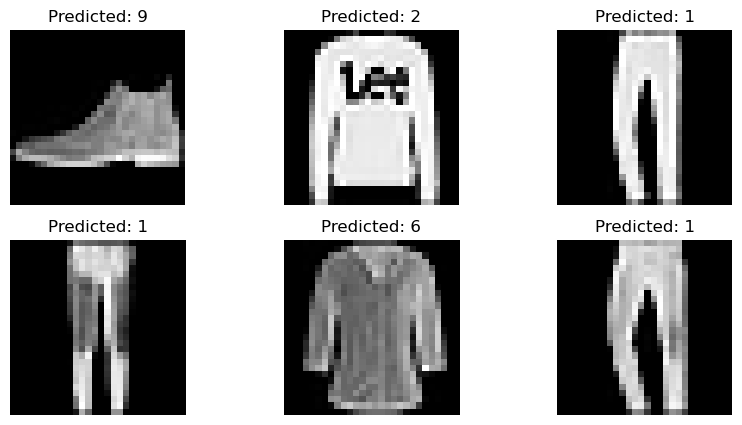

In [7]:
def visualize_predictions(model, test_loader):
    model.eval()
    images, labels = next(iter(test_loader))
    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap="gray")
        plt.title(f"Predicted: {preds[i].item()}")
        plt.axis("off")
    plt.show()


visualize_predictions(model, test_loader)